# **AI Virtual Career Counsellor**

## K-Nearest Neighbors (KNN)

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load Dataset
url = "https://raw.githubusercontent.com/SiddardhaShayini/Career-Recommender-Dataset/refs/heads/main/dataset/cleaned_dataset.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,Drawing,Dancing,Singing,Sports,Video_Game,Acting,Travelling,Gardening,Animals,Photography,...,Doctor,Pharmisist,Cycling,Knitting,Director,Journalism,Bussiness,Listening_Music,Courses,Career_Options
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,BBA- Bachelor of Business Administration,"Business Analyst, Marketing Executive, HR Mana..."
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,BBA- Bachelor of Business Administration,"Business Analyst, Marketing Executive, HR Mana..."
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,BBA- Bachelor of Business Administration,"Business Analyst, Marketing Executive, HR Mana..."
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,BBA- Bachelor of Business Administration,"Business Analyst, Marketing Executive, HR Mana..."
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,BBA- Bachelor of Business Administration,"Business Analyst, Marketing Executive, HR Mana..."


In [4]:
# Encode Target Labels
le = LabelEncoder()
df['Courses_Encoded'] = le.fit_transform(df['Courses'])

In [5]:
# Features and Target
X = df.drop(['Courses', 'Career_Options', 'Courses_Encoded'], axis=1)
y = df['Courses_Encoded']

In [6]:
# Shuffle and Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [7]:
# Train KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
# Make Predictions
y_pred = knn.predict(X_test)

In [14]:
print("Classification Report:\n")
print(classification_report(
    y_test,
    y_pred,
    labels=le.transform(le.classes_),
    target_names=le.classes_
))


Classification Report:

                                                     precision    recall  f1-score   support

                 Animation, Graphics and Multimedia       1.00      1.00      1.00        24
                   B.Arch- Bachelor of Architecture       1.00      1.00      1.00        19
                        B.Com- Bachelor of Commerce       1.00      0.83      0.91        18
                                              B.Ed.       1.00      1.00      1.00        22
                                B.Sc Bioinformatics       0.00      0.00      0.00         0
                                      B.Sc Genetics       0.00      0.00      0.00         0
                                 B.Sc Healthcare IT       0.00      0.00      0.00         0
                        B.Sc Medical Lab Technology       0.00      0.00      0.00         0
                              B.Sc- Applied Geology       1.00      1.00      1.00        19
                                      B.Sc- N

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

In [10]:
print("\n Accuracy Score:", accuracy_score(y_test, y_pred))


 Accuracy Score: 0.9943502824858758


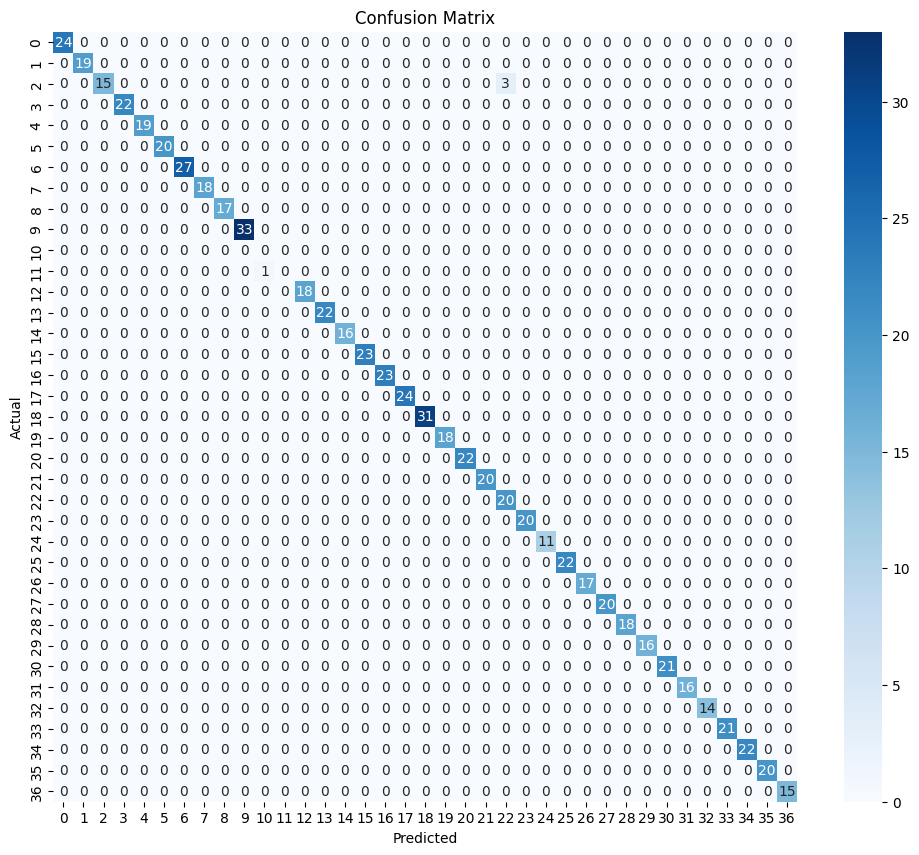

In [11]:
# Confusion Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [12]:
# Regression-Style Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n Regression-Style Error Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")


 Regression-Style Error Metrics:
Mean Squared Error (MSE): 3.32
Root Mean Squared Error (RMSE): 1.82
Mean Absolute Error (MAE): 0.12
R-squared (R²): 0.98


In [13]:
# Interest Labels Reference
interests = list(X.columns)
interest_map = {i+1: interests[i] for i in range(len(interests))}

# Display for User
print("Available Interests (Choose numbers):")
for k, v in interest_map.items():
    print(f"{k}: {v}")

# Example: Select some interest numbers
selected_interest_numbers = [13, 17, 22, 43, 47]  # Example: Coding, Researching, Physics, English, Solving_Puzzles

# Create Input Vector
input_vector = [0] * len(interests)
for i in selected_interest_numbers:
    input_vector[i - 1] = 1

# Reshape & Predict
input_array = np.array(input_vector).reshape(1, -1)
predicted_class = knn.predict(input_array)[0]
predicted_course = le.inverse_transform([predicted_class])[0]

print("\n🎓 Recommended Course:", predicted_course)


Available Interests (Choose numbers):
1: Drawing
2: Dancing
3: Singing
4: Sports
5: Video_Game
6: Acting
7: Travelling
8: Gardening
9: Animals
10: Photography
11: Teaching
12: Exercise
13: Coding
14: Electricity_Components
15: Mechanic_Parts
16: Computer_Parts
17: Researching
18: Architecture
19: Historic_Collection
20: Botany
21: Zoology
22: Physics
23: Accounting
24: Economics
25: Sociology
26: Geography
27: Psycology
28: History
29: Science
30: Bussiness_Education
31: Chemistry
32: Mathematics
33: Biology
34: Makeup
35: Designing
36: Content_Writing
37: Crafting
38: Literature
39: Reading
40: Cartooning
41: Debating
42: Asrtology
43: Hindi
44: French
45: English
46: Urdu
47: Other Language
48: Solving_Puzzles
49: Gymnastics
50: Yoga
51: Engeeniering
52: Doctor
53: Pharmisist
54: Cycling
55: Knitting
56: Director
57: Journalism
58: Bussiness
59: Listening_Music

🎓 Recommended Course: B.Sc.- Physics


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [15]:
import joblib
from google.colab import files


In [17]:
# Save KNN model
joblib.dump(knn, 'knn_model.pkl')

# Download
files.download('knn_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>